# Experiment outline

## Goals/Questions: 

- Re-measure pairs and trios involving Pa using new, faint strain.
- Measure all leave-one-out competitions. (7 species).

## Experimental design:

- Initial total OD is 10^-4.
- Start from 3 initial compositions for each pair: (.90, .05, .05), (.05, .90, .05) & (.05, .05, .90).
- Growth conditions:
    - In Cockroach at 25c
    - Not shaken.
    - 48hrs tansfers
    - Dilution factor of 1500 each transfer
    - Plate parafilmed around edge.
- Characterize communities by measuring OD on Varioskan at the end of each transfer & by plating after transferand 5.


# Conclusions






# Results

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from GoreUtilities import plot_heat_map
from GoreUtilities.graph import plot_ndpanel, set_pretty_defaults, array2colors
from itertools import product, combinations
# import pysurvey as ps
from ipywidgets import interact, fixed

import pandas as pd
import glob
import string
import seaborn as sns

sns.set_style('white')

# set_pretty_defaults(xlabelsize=20, ylabelsize=20, fontsize=20)
# rc("savefig", dpi=150)


In [5]:
species = [ 'Ea', 'Pa', 'Pch', 'Pci', 'Pf', 'Pp' , 'Pv', 'Sm']

## Count data

In [6]:
def norm_fun(x):
    if x.sum()==0:
        return 0*x
    else:
        return 1.*x/x.sum()

### Day 5 counts

In [7]:
xls_file = '../data/colony_counts/2016-02-03_EXP41_counts.xlsx'
xls = pd.ExcelFile(xls_file)

plates = arange(1,6)
counts_d = {}

for p in plates:
    tmp = xls.parse('T5_P%d'%(p), na_values=['na'], parse_cols=9).fillna(0)
    ind = tmp.applymap(lambda x:x=='na')
    tmp[ind] = nan
    tmp['Plate'] = p
    counts_d[p] = tmp
counts_t5 = pd.concat(counts_d.values()).set_index(['Plate', 'Row', 'Col']).sort_index()
fracs_t5 = counts_t5.apply(norm_fun, axis=1 )
counts_t5.xs((4,1), level=('Plate', 'Col'))

,Ea,Pa,Pch,Pci,Pf,Pp,Pv,Sm
Row,,,,,,,,
A,2,0,46,0,13,15,3,0
B,0,0,50,0,5,0,23,4
C,0,0,53,0,0,0,36,0
D,0,0,53,0,0,0,32,1
E,0,0,34,0,19,12,16,0
F,0,0,49,0,1,21,4,0
G,0,0,80,0,0,0,41,0
H,0,0,44,0,2,17,12,2


In [8]:
fracs_t5.to_csv('2016-02-03.EXP_41-competitions_with_new_Pa/fracs_t5.csv')

In [128]:
from PlateReaderTools import PRPlate, VarioskanParser

def get_OD(p):
    bg = .035
    f = '../data/plate_reader/2016-02-03.EXP_41.T5.P%d.txt'%p
    od = PRPlate.from_file('tmp', f, VarioskanParser).data.squeeze() - bg
    od.columns = 1 + arange(12)
    od_flat = od.T.unstack()
    od_repeated = pd.concat([od_flat]*8, axis=1)
    od_repeated.columns = fracs_t5.columns
    return od_repeated

partial_OD_t5 = fracs_t5.copy()

for p in arange(5)+1:
    print p
    od_repeated = get_OD(p).reindex_like(partial_OD_t5.loc[p])
    partial_OD_t5.loc[p] = partial_OD_t5.loc[p].values*od_repeated.values


partial_OD_t5.to_csv('2016-02-03.EXP_41-competitions_with_new_Pa/partial_OD_t5.csv')

1
2
3
4
5


In [9]:
# # # adjust first time point
# tmp = xls.parse('T0_singles', na_values=['na'], parse_cols=9).fillna(0)
# ind = tmp.applymap(lambda x:x=='na')
# tmp[ind] = nan
# counts0 = tmp.set_index(['Plate', 'Row', 'Col']).sort_index()
# counts.loc[0, :] = counts.loc[0, :].values * counts0.values
# counts.loc[0]

104.0 83.0 65.0 85.1387283237 32.4907875356 15.0


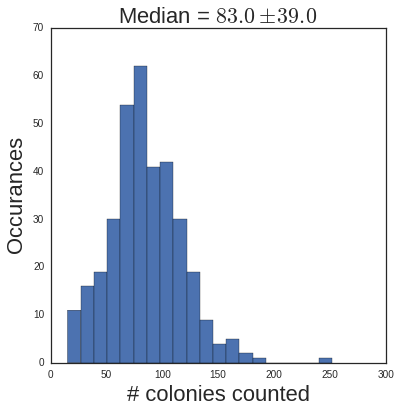

In [8]:
fig, ax = subplots(figsize=(6,6))
tot_counts = counts_t5.sum(axis=1).values
pos_tot = tot_counts[tot_counts>0]
med = median(pos_tot)
q75, q50, q25 = percentile(pos_tot, [75 ,50, 25])
iqr = q75 - q25

ax.hist(pos_tot, bins=20)
ax.set_title('Median = $%.1f \pm%.1f$'%(q50,iqr), size=22)
ax.set_xlabel('# colonies counted', size=22)
ax.set_ylabel('Occurances', size=22)

print q75, q50, q25, pos_tot.mean(), pos_tot.std(), pos_tot.min()

### 8 species time series 

In [10]:
xls_file = '../data/colony_counts/2016-02-03_EXP41_counts.xlsx'
xls = pd.ExcelFile(xls_file)

tmp = xls.parse('all_species_time_series', na_values=['na'], parse_cols=12).fillna(0)
ind = tmp.applymap(lambda x:x=='na')
tmp[ind] = nan
counts_8ts = tmp.set_index(['Transfer', 'Plate', 'Row', 'Col']).sort_index()
fracs_8ts = counts_8ts.apply(norm_fun, axis=1 )
counts_8ts.loc[6]

Ea  Pa  Pch  Pci  Pf  Pp  Pv  Sm
Plate Row Col                                  
1     A   11    3   0   23    0   6   4  20   0
      B   11    0   0   27    0   2   0  25   0
      C   11    2   0   29    0   0   0  17   0
      D   11    0   0   40    0   1   0  46   0
      E   11    0   0   30    0   3   0  34   0
      F   11    0   0   26    0   4  14  16   0
      G   11    0   0   35    0   0   0  21   0
      H   11    0   0   25    0   2   0  25   1

/host/home/yonatanf/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


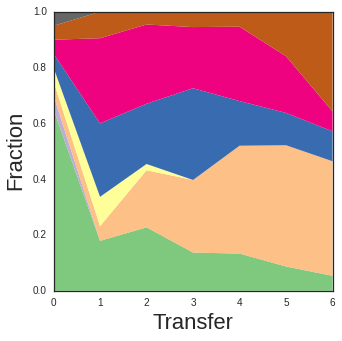

In [11]:
rows = fracs_8ts.index.levels[2]
fig, ax = subplots(figsize=(5, 5))

r = rows[0]

out = fracs_8ts.xs((1, r ,11), level=('Plate','Row', 'Col')).plot(kind='area', colormap=cm.Accent, 
                                             lw=.01, ax=ax, legend=False)
ax.set_ylim(0,1)
ax.set_xlabel('Transfer', size=22)
ax.set_ylabel('Fraction', size=22)

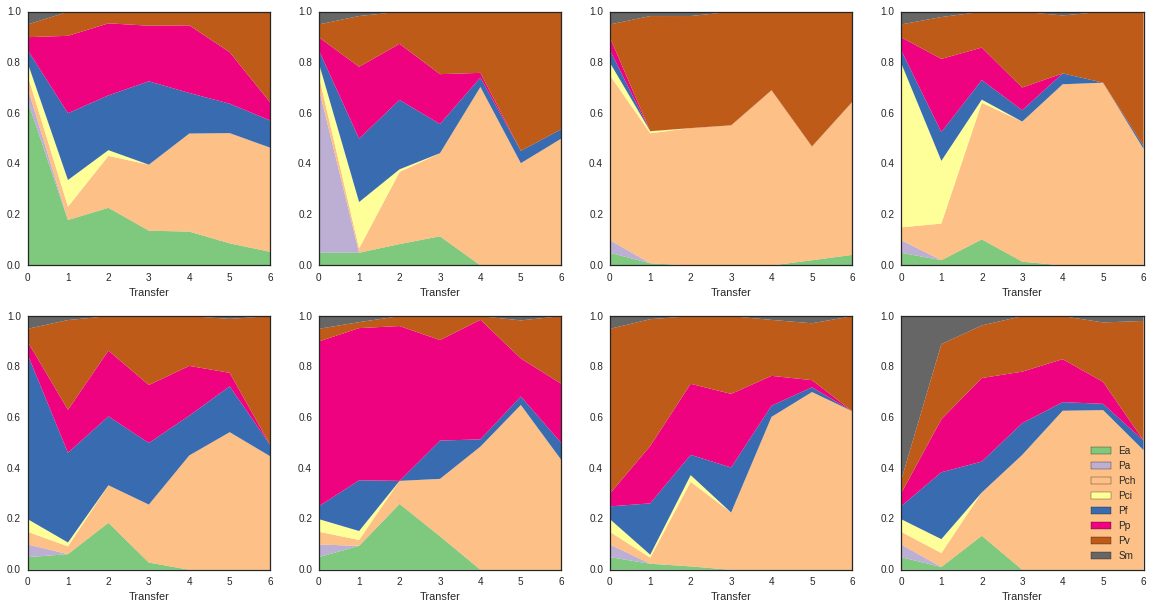

In [12]:
rows = fracs_8ts.index.levels[2]
fig, axs = subplots(2,4, figsize=(4*5, 2*5))
for i,r in enumerate(rows):
    ax = axs.flat[i]
    leg = True if i==7 else False
    out = fracs_8ts.xs((1, r ,11), level=('Plate','Row', 'Col')).plot(kind='area', colormap=cm.Accent, 
                                                 lw=.01, ax=ax, legend=leg)
    ax.set_ylim(0,1)
    
if ax.is_first_row():
    ax.set_xlabel('')
if ax.is_first_col():
    ax.set_ylabel('Fraction', size=20)

In [13]:
from pysurvey.plotting.Bars import multibar

species_colors = array2colors(arange(8), cmap=cm.Accent)
species_colors_d = {species[i]:species_colors[i] for i in range(8) }

n = 8
space = 3

to_plot1 = fracs_8ts.loc[6]
to_plot2 = fracs_t5.xs((1,12), level=('Plate', 'Col'))


fig, ax = subplots(figsize=(10,5))
bars_1 = multibar(arange(n)*space, to_plot1, cmap=cm.Accent, ax=ax, alpha=1, lw=1)
bars_2 = multibar(space/3.+arange(n)*space, to_plot2, cmap=cm.Accent, ax=ax, alpha=1, lw=1)

ax.set_xlim(-1,(n-1)*space+space/3.+1)
xtcks = ax.set_xticks(arange(n)*space+space/6.)
xlbls = species
xtcklbls = ax.set_xticklabels(xlbls, size=22)

for xtck in xtcklbls:
    xtck.set_backgroundcolor(species_colors_d[xtck.get_text()])
    

ax.set_yticks([0,0.25,.5, .75, 1])
ax.set_ylabel('Fraction', size=22)

xlbl = ax.set_xlabel('Initial Dominant Species', size=22, labelpad=20)

ax.legend(species, loc=6, bbox_to_anchor=(1.01,0.5), frameon=False)

ImportError: cannot import name nanmedian

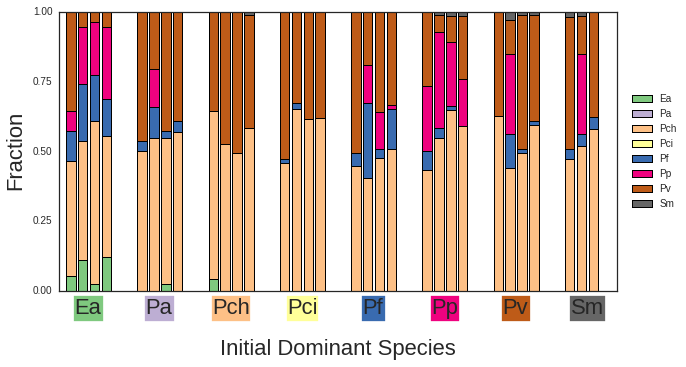

In [13]:
from pysurvey.plotting.Bars import multibar

species_colors = array2colors(arange(8), cmap=cm.Accent)
species_colors_d = {species[i]:species_colors[i] for i in range(8) }

n = 8


to_plot1 = fracs_8ts.loc[6]
to_plot2 = fracs_t5.xs((1,12), level=('Plate', 'Col'))
to_plot3 = pd.concat([fracs_t5.loc[(4, r, i+1)] for i,r in enumerate(rows)], axis=1).T
to_plot4 = pd.concat([fracs_t5.loc[(5, r, i+1)] for i,r in enumerate(rows)], axis=1).T

to_plot = [to_plot1, to_plot2, to_plot3, to_plot4]

m = 4.
w = 1

space = (m+2)*w 

fig, ax = subplots(figsize=(10,5))
for i, df in enumerate(to_plot):
    pos = i*w + arange(n)*space
    bars = multibar(pos, df, cmap=cm.Accent, ax=ax, alpha=1, lw=1)
    
ax.set_xlim(-1, pos[-1]+1)
# xtcks = ax.set_xticks(arange(n)*space+space/6.)
xtcks = ax.set_xticks(m/2*w + arange(n)*space -.5)
xlbls = species
xtcklbls = ax.set_xticklabels(xlbls, size=22)

for xtck in xtcklbls:
    xtck.set_backgroundcolor(species_colors_d[xtck.get_text()])
    

ax.set_yticks([0,0.25,.5, .75, 1])
ax.set_ylabel('Fraction', size=22)

xlbl = ax.set_xlabel('Initial Dominant Species', size=22, labelpad=20)

ax.legend(species, loc=6, bbox_to_anchor=(1.01,0.5), frameon=False)

(0, 1)

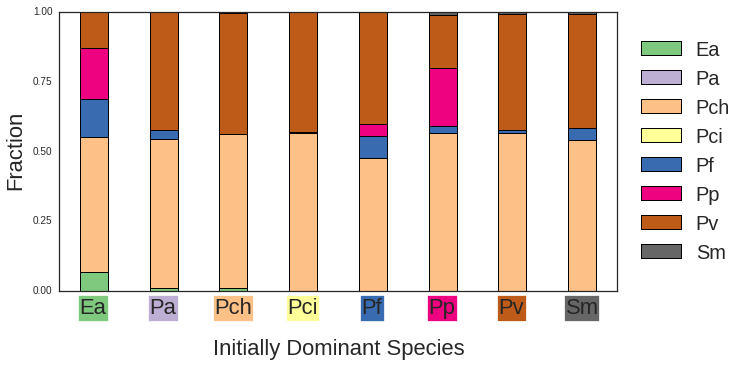

In [14]:
## averges communities for each initial condition
to_drop = []

c1 = counts_8ts.loc[6].drop(to_drop, level=1)
c2 = counts_t5.xs((1,12), level=('Plate', 'Col')).drop(to_drop)
c3 = pd.concat([counts_t5.loc[(4, r, i+1)] for i,r in enumerate(rows)], axis=1).T.drop(to_drop, level=1)
c4 = pd.concat([counts_t5.loc[(5, r, i+1)] for i,r in enumerate(rows)], axis=1).T.drop(to_drop, level=1)

c_tot_all = c1+c2+c3.values+c4.values
c_tot_all = c1+c3.values+c4.values # c2 looks very different from rest, so exclude
f_tot_all = c_tot_all.apply(norm_fun, axis=1)       

n = 8
space = 2

fig, ax = subplots(figsize=(10,5))
bars_1 = multibar(arange(n)*space, f_tot_all, cmap=cm.Accent, ax=ax, alpha=1, lw=1)

ax.set_xlim(-1,(n-1)*space+1)
xtcks = ax.set_xticks(arange(n)*space)
xlbls = f_tot_all.columns
xtcklbls = ax.set_xticklabels(xlbls, size=22)

for xtck in xtcklbls:
    xtck.set_backgroundcolor(species_colors_d[xtck.get_text()])
    

ax.set_yticks([0,0.25,.5, .75, 1])
ax.set_ylabel('Fraction', size=22)

xlbl = ax.set_xlabel('Initially Dominant Species', size=22, labelpad=20)

ax.legend(species, loc=6, bbox_to_anchor=(1.01,0.5), frameon=False, fontsize=20)
ax.set_ylim(0,1)

### 7 species competitions 

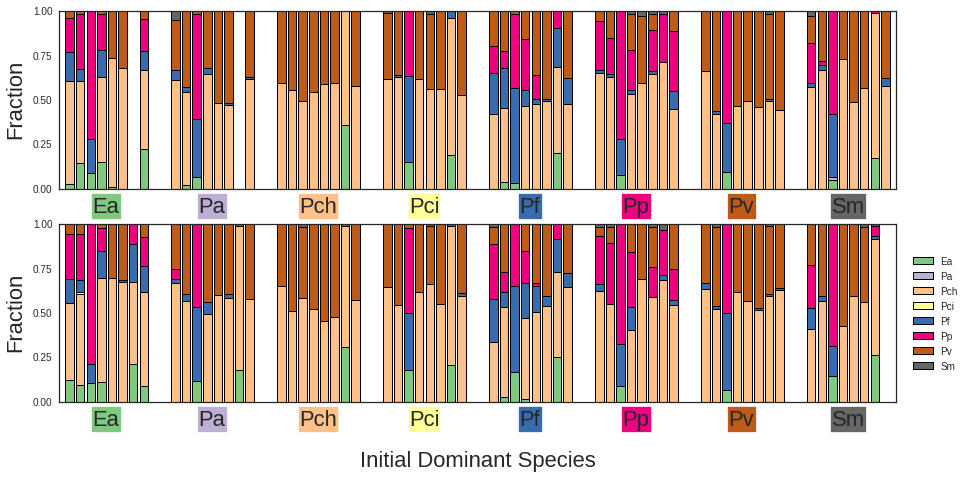

In [15]:
fig, axs = subplots(2, 1, figsize=(15,7))

cols = arange(1,9)

for i, ax in enumerate(axs):
    to_plot = [fracs_t5.loc[(4+i, slice(None,),  c)] for c in cols]

    n = 8
    m = 1.*len(to_plot)
    w = 1

    space = (m+2)*w 

    for i, df in enumerate(to_plot):
        pos = i*w + arange(n)*space
        bars = multibar(pos, df, cmap=cm.Accent, ax=ax, alpha=1, lw=1)
    
    ax.set_xlim(-1, pos[-1]+1)

    xtcks = ax.set_xticks(m/2*w + arange(n)*space -.5)
    xlbls = species
    xtcklbls = ax.set_xticklabels(xlbls, size=22)

    for xtck in xtcklbls:
        xtck.set_backgroundcolor(species_colors_d[xtck.get_text()])


    ax.set_yticks([0,0.25,.5, .75, 1])
    ax.set_ylabel('Fraction', size=22)

xlbl = ax.set_xlabel('Initial Dominant Species', size=22, labelpad=20)

ax.legend(species, loc=6, bbox_to_anchor=(1.01,0.5), frameon=False)

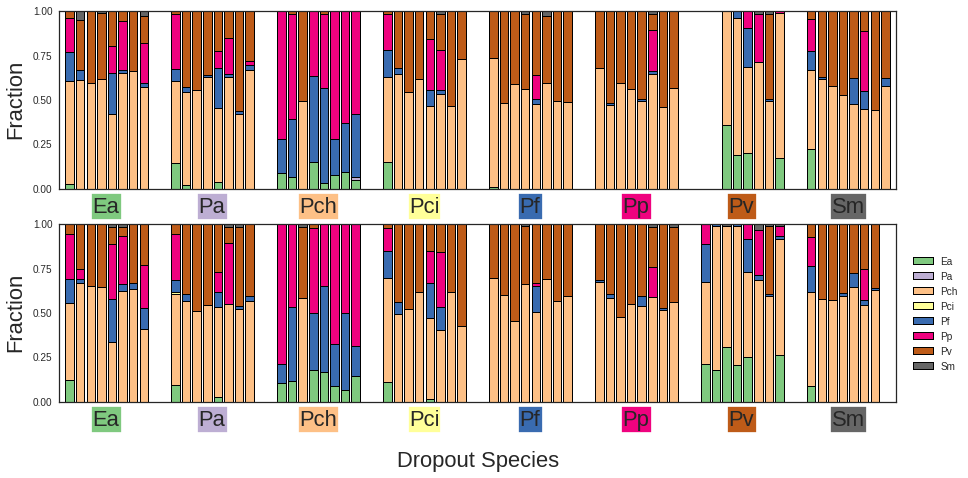

In [16]:
fig, axs = subplots(2, 1, figsize=(15,7))

for i, ax in enumerate(axs):
    to_plot = [fracs_t5.loc[(4+i, r)] for r in rows]

    n = 8
    m = 1.*len(to_plot)
    w = 1

    space = (m+2)*w 

    for i, df in enumerate(to_plot):
        pos = i*w + arange(n)*space
        bars = multibar(pos, df, cmap=cm.Accent, ax=ax, alpha=1, lw=1)
    
    ax.set_xlim(-1, pos[-1]+1)

    xtcks = ax.set_xticks(m/2*w + arange(n)*space -.5)
    xlbls = species
    xtcklbls = ax.set_xticklabels(xlbls, size=22)

    for xtck in xtcklbls:
        xtck.set_backgroundcolor(species_colors_d[xtck.get_text()])


    ax.set_yticks([0,0.25,.5, .75, 1])
    ax.set_ylabel('Fraction', size=22)

xlbl = ax.set_xlabel('Dropout Species', size=22, labelpad=20)

ax.legend(species, loc=6, bbox_to_anchor=(1.01,0.5), frameon=False)

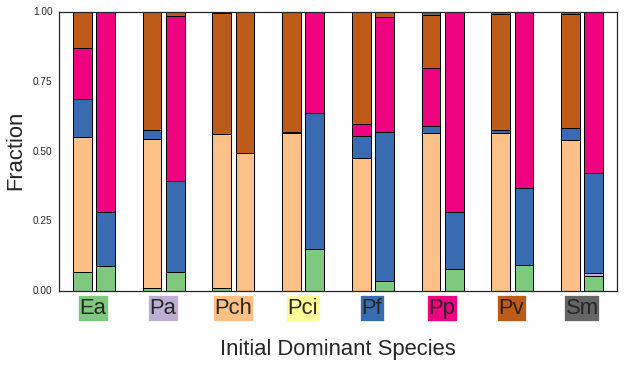

In [17]:
from pysurvey.plotting.Bars import multibar

to_drop = []

c1 = counts_8ts.loc[6].drop(to_drop, level=1)
c2 = counts_t5.xs((1,12), level=('Plate', 'Col')).drop(to_drop)
c3 = pd.concat([counts_t5.loc[(4, r, i+1)] for i,r in enumerate(rows)], axis=1).T.drop(to_drop, level=1)
c4 = pd.concat([counts_t5.loc[(5, r, i+1)] for i,r in enumerate(rows)], axis=1).T.drop(to_drop, level=1)

c_tot_all = c1+c2+c3.values+c4.values
c_tot_all = c1+c3.values+c4.values # c2 looks very different from rest, so exclude
f_tot_all = c_tot_all.apply(norm_fun, axis=1)       


n = 8
space = 3

to_plot1 = f_tot_all
to_plot2 = pd.concat([fracs_t5.loc[(4, r, 2+1)] for i,r in enumerate(rows)], axis=1).T.drop(to_drop, level=1)


fig, ax = subplots(figsize=(10,5))
bars_1 = multibar(arange(n)*space, to_plot1, cmap=cm.Accent, ax=ax, alpha=1, lw=1)
bars_2 = multibar(space/3.+arange(n)*space, to_plot2, cmap=cm.Accent, ax=ax, alpha=1, lw=1)

ax.set_xlim(-1,(n-1)*space+space/3.+1)
xtcks = ax.set_xticks(arange(n)*space+space/6.)
xlbls = species
xtcklbls = ax.set_xticklabels(xlbls, size=22)

for xtck in xtcklbls:
    xtck.set_backgroundcolor(species_colors_d[xtck.get_text()])
    

ax.set_yticks([0,0.25,.5, .75, 1])
ax.set_ylabel('Fraction', size=22)

xlbl = ax.set_xlabel('Initial Dominant Species', size=22, labelpad=20)

# ax.legend(species, loc=6, bbox_to_anchor=(1.01,0.5), frameon=False)

savefig('/host/home/yonatanf/Downloads/all_species_competition.and_Pch_KO.average.png', dpi=300, bbox_inches='tight')

In [151]:
pd.concat([counts_t5.loc[(4, r, i+1)] for i,r in enumerate(rows)], axis=1).T.drop(to_drop, level=1)

Ea  Pa  Pch  Pci  Pf  Pp  Pv  Sm
4 A 1   2   0   46    0  13  15   3   0
  B 2   2   0   44    0   2   0  36   0
  C 3   0   0   39    0   0   0  40   0
  D 4   0   0   56    0   0   0  35   0
  E 5   0   0   29    0   2   8  22   0
  F 6   0   0   48    0   1  17   7   1
  G 7   0   0   38    0   1   0  37   1
  H 8   0   0   54    0   4   0  35   0

In [14]:
## 8 species average
# to_drop = ['A','C','D', 'E', 'F', 'G', 'H']
to_drop = ['F','A']
to_drop = []

c1 = counts_8ts.loc[6].drop(to_drop, level=1)
c2 = counts_t5.xs((1,12), level=('Plate', 'Col')).drop(to_drop)
c3 = pd.concat([counts_t5.loc[(4, r, i+1)] for i,r in enumerate(rows)], axis=1).T.drop(to_drop, level=1)
c4 = pd.concat([counts_t5.loc[(5, r, i+1)] for i,r in enumerate(rows)], axis=1).T.drop(to_drop, level=1)

c_tot_all = c1+c2+c3.values+c4.values
c_tot_all = c1+c3.values+c4.values
f_tot_all = c_tot_all.apply(norm_fun, axis=1)       

In [140]:
## knockouts averages
col_names = ['All'] + [r'$\Delta_{%s}$'%s for s in species]
counts_avg = pd.DataFrame(columns=col_names)
fracs_med = pd.DataFrame(columns=col_names)

cols = arange(1,9)
for col in cols:
    to_drop2 = to_drop + [rows[col-1]]
    c1 = counts_t5.xs((4,col), level=('Plate', 'Col')).drop(to_drop2)
    c2 = counts_t5.xs((4,col), level=('Plate', 'Col')).drop(to_drop2)

    c_tot = c1+c2
    counts_avg[r'$\Delta_{%s}$'%species[col-1]] = c_tot.sum()
    
    f_tot = c_tot.apply(norm_fun, axis=1)
    fracs_med [r'$\Delta_{%s}$'%species[col-1]] = norm_fun(f_tot.median())

counts_avg['All'] = c_tot_all.sum()
fracs_avg = counts_avg.apply(norm_fun)

fracs_med['All'] = f_tot_all.median()

In [139]:
f_tot

,Ea,Pa,Pch,Pci,Pf,Pp,Pv,Sm
Row,,,,,,,,
A,0.222222,0,0.444444,0,0.111111,0.180556,0.041667,0
B,0.000000,0,0.616438,0,0.013699,0.000000,0.369863,0
C,0.000000,0,0.578947,0,0.000000,0.000000,0.421053,0
D,0.000000,0,0.529412,0,0.000000,0.000000,0.470588,0
E,0.000000,0,0.475000,0,0.150000,0.000000,0.375000,0
F,0.000000,0,0.450704,0,0.098592,0.338028,0.112676,0
G,0.000000,0,0.441176,0,0.000000,0.000000,0.558824,0


In [133]:
fracs_med

,All,$\Delta_{Ea}$,$\Delta_{Pa}$,$\Delta_{Pch}$,$\Delta_{Pci}$,$\Delta_{Pf}$,$\Delta_{Pp}$,$\Delta_{Pv}$,$\Delta_{Sm}$
Ea,0.000000,0.000000,0.000000,0.077244,0.000000,0.000000,0.000000,0.215217,0.000000
Pa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pch,0.547247,0.674825,0.634554,0.000000,0.641491,0.569444,0.561644,0.784783,0.549960
Pci,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pf,0.029009,0.014756,0.017778,0.325678,0.031292,0.000000,0.000000,0.000000,0.015860
Pp,0.000000,0.000000,0.031606,0.597077,0.000000,0.000000,0.000000,0.000000,0.000000
Pv,0.412853,0.310419,0.316061,0.000000,0.327217,0.430556,0.438356,0.000000,0.434179
Sm,0.002427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


(0, 1)

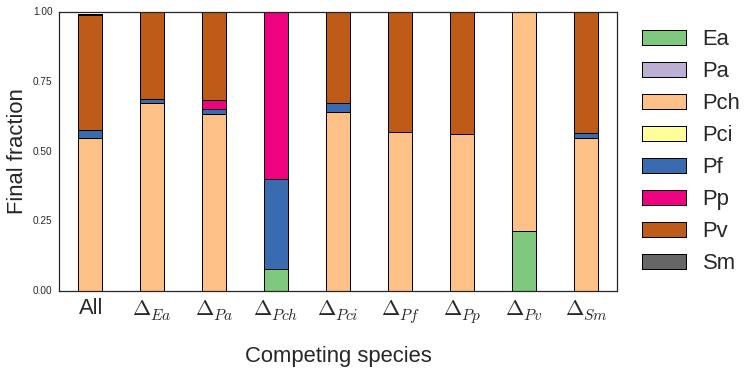

In [20]:
n = 9
space = 2

fig, ax = subplots(figsize=(10,5))
bars_1 = multibar(arange(n)*space, fracs_med.T, cmap=cm.Accent, ax=ax, alpha=1, lw=1)

ax.set_xlim(-1,(n-1)*space+1)
xtcks = ax.set_xticks(arange(n)*space)
xlbls = fracs_avg.columns
xtcklbls = ax.set_xticklabels(xlbls, size=22)

# for xtck in xtcklbls:
#     xtck.set_backgroundcolor(species_colors_d[xtck.get_text()])
    

ax.set_yticks([0,0.25,.5, .75, 1])
ax.set_ylabel('Final fraction', size=22)

xlbl = ax.set_xlabel('Competing species', size=22, labelpad=20)

ax.legend(species, loc=6, bbox_to_anchor=(1.01,0.5), frameon=False, fontsize=22)
ax.set_ylim(0,1)



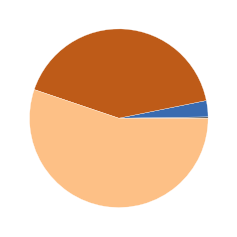

In [21]:
fig, ax = subplots(figsize=(4,4))
f = fracs_med['All'].sort_values()
cs = [species_colors_d[s] for s in f.index]
out = ax.pie((f/f.sum()).values, colors=cs)


for pie_wedge in out[0]:
    pie_wedge.set_edgecolor('white')

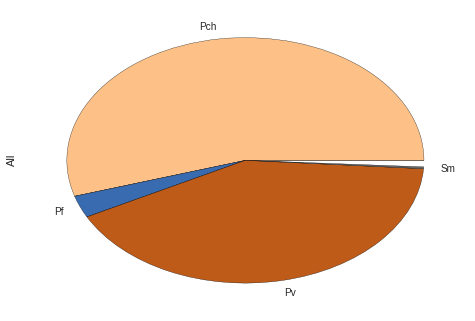

In [22]:
fracs_med['All'].plot(kind='pie', colors=species_colors)

In [23]:
from scipy.spatial.distance import pdist, squareform
from pysurvey.util.distances import JSsqrt

X = fracs_t5.loc[4:5]
d = pd.DataFrame(squareform(pdist(X, metric=JSsqrt)), index=X.index, columns=X.index)

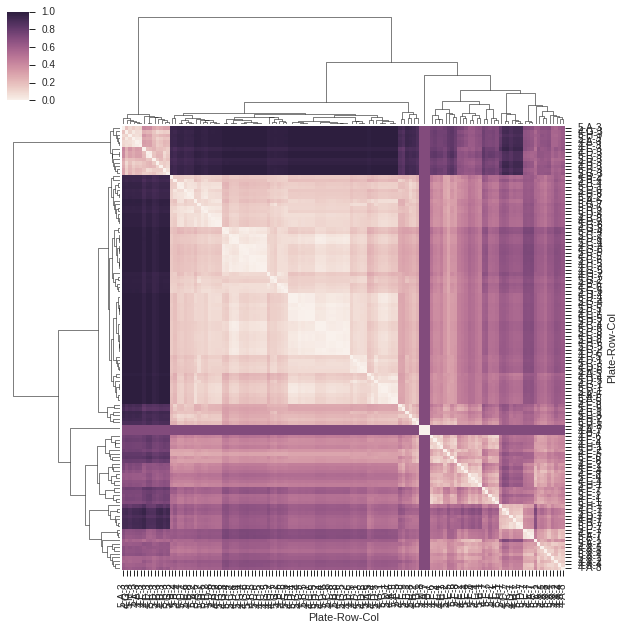

In [24]:
import seaborn as sns
sns.set_style('ticks')
sns.clustermap(d)

[ 0.69691947  0.18926689]


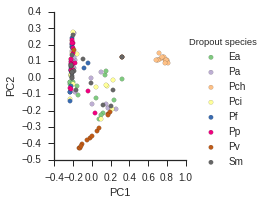

In [25]:
from sklearn.decomposition import PCA
import string

pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
print pca.explained_variance_ratio_

t = pd.DataFrame(X_new, columns=['PC1', 'PC2'])
t['Dominant species'] = map(lambda v: species[string.uppercase.index(v)], X.index.get_level_values('Row'))
t['Dropout species'] = map(lambda v: species[v-1], X.index.get_level_values('Col'))

fg = sns.FacetGrid(data=t, hue='Dropout species', palette=species_colors)
fg.map(pyplot.scatter, 'PC1', 'PC2', lw=.1, edgecolors='k').add_legend()

### Pair time series 

In [16]:
## readplate reader data

from PlateReaderTools import PRPlate, iControlParser, VarioskanParser

def get_platereader_data(files):
    n = len(files)
    
    ods = pd.Panel(zeros((n, 8, 12)), items=arange(n)+1,
                     minor_axis=arange(12)+1, 
                     major_axis=list(string.uppercase[:8]))

    bg = .035
#     bg = 0
    for f in files:
        t = f.split('.')[-3][-1]
        od = PRPlate.from_file('tmp', f, VarioskanParser).data.squeeze() - bg
        ods.values[int(t)-1] = od
    return ods

files = glob.glob('../data/plate_reader/*EXP_41*.P%d.txt'%1)
ods1 = get_platereader_data(files)


files = glob.glob('../data/plate_reader/*EXP_41*.P%d.txt'%2)
ods2 = get_platereader_data(files)

In [17]:
ods_combined = pd.Panel4D({p:get_platereader_data(glob.glob('../data/plate_reader/*EXP_41*.P%d.txt'%p)) for p in range(1,3)})

init_OD = 1e-4*1500
ods_combined.loc[:,0] = init_OD
ods_combined = ods_combined.sort_index(axis=1, )
ods_combined

<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 2 (labels) x 6 (items) x 8 (major_axis) x 12 (minor_axis)
Labels axis: 1 to 2
Items axis: 0 to 5
Major_axis axis: A to H
Minor_axis axis: 1 to 12

In [18]:
xls_file = '../data/colony_counts/2016-02-03_EXP41_counts.xlsx'
xls = pd.ExcelFile(xls_file)

tmp = xls.parse('pairs_time_series', na_values=['na'], parse_cols=12).fillna(0)
ind = tmp.applymap(lambda x:x=='na')
tmp[ind] = nan
counts_2ts = tmp.set_index(['Transfer', 'Plate', 'Row', 'Col']).sort_index()
fracs_2ts = counts_2ts.apply(norm_fun, axis=1 )
counts_2ts.loc[0]

Ea   Pa  Pch  Pci  Pf  Pp  Pv  Sm
Plate Row Col                                   
1     A   2     5   95    0    0   0   0   0   0
      B   2     0  100    0    0   0   0   0   0
      C   2     0   95    5    0   0   0   0   0
      D   2     0   95    0    5   0   0   0   0
      E   2     0   95    0    0   5   0   0   0
      F   2     0   95    0    0   0   5   0   0
      G   2     0   95    0    0   0   0   5   0
      H   2     0   95    0    0   0   0   0   5
2     A   1    95    5    0    0   0   0   0   0
      B   2     0  100    0    0   0   0   0   0
      C   3     0    5   95    0   0   0   0   0
      D   4     0    5    0   95   0   0   0   0
      E   5     0    5    0    0  95   0   0   0
      F   6     0    5    0    0   0  95   0   0
      G   7     0    5    0    0   0   0  95   0
      H   8     0    5    0    0   0   0   0  95

In [19]:
partial_OD_2ts = fracs_2ts.copy()
for ind in partial_OD_2ts.index:
    t, p, r, c = ind
    od = ods_combined.loc[p,t,r,c]
    partial_OD_2ts.loc[ind] *= od

In [20]:
counts_2ts.to_csv('2016-02-03.EXP_41-competitions_with_new_Pa/pair_counts.csv')
partial_OD_2ts.to_csv('2016-02-03.EXP_41-competitions_with_new_Pa/pair_partial_OD.csv')

In [21]:
## add error estimates
def dir_std(a):
    a0 = a.sum()
    dir_var = a*(a0-a)/a0**2/(a0+1)
    return dir_var**0.5

fracs_2ts_std = counts_2ts.apply(dir_std, axis=1, )

In [22]:
def line_plot(df, ax, cmap=cm.Accent, **kwargs):
    n_lines = df.shape[0]
    cs = array2colors(arange(n_lines), cmap=cmap)
    ax.set_color_cycle(cs)
    out = ax.plot(df.T, lw=3, marker='o', ms=10)
    return out

def errorbar_plot(df, er, ax, x=None, c=None, cmap=cm.Accent, **kwargs):
    n_lines = df.shape[0]
    if c is None:
        cs = array2colors(arange(n_lines), cmap=cmap)
    elif hasattr(c, '__iter__'):
        cs = c
    else:
        cs = [c]*n_lines
    kwargs.setdefault('lw',3)
    kwargs.setdefault('marker','o')
    kwargs.setdefault('ms',10)
    kwargs.setdefault('lw',3)
    kwargs.setdefault('ls','-')
    for i,(sp,y) in enumerate(df.iterrows()):
        x = arange(len(y)) if x is None else x
        c = cs[i]
        if er is not None:
            yerr = er.ix[sp]
            out = ax.errorbar(x,y, yerr=yerr, color=c, ecolor=c, 
    #                          lw=3, marker='o', ms=10, 
                             label=sp,
                             **kwargs)
        else:
            out = ax.plot(x,y,  color=c,
#                          lw=3, marker='o', ms=10, 
#                          label=sp,
                         **kwargs)
    return out


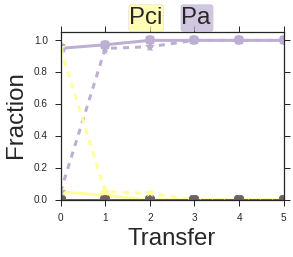

In [29]:
rows = fracs_8ts.index.levels[2]

@interact(s1=(0,7), ax=fixed(None))
def plot_pair(s1, ax=None):
    row = rows[s1]

    if ax is None:
        fig, ax = subplots(figsize=(4,3))
    df1 = fracs_2ts.xs((row,1), level=('Row', 'Plate')).T
    er1 = fracs_2ts_std.xs((row,1), level=('Row', 'Plate')).T
    df2 = fracs_2ts.xs((row,2), level=('Row', 'Plate')).T
    er2 = fracs_2ts_std.xs((row,2), level=('Row', 'Plate')).T
    errorbar_plot( df1, er1,  ax=ax)
    errorbar_plot( df2, er2,  ax=ax,  ls='--', marker='*')

    ax.set_ylim(0,1.05)
    ax.set_xlabel('Transfer' , size=24)
    ax.set_ylabel('Fraction' , size=24)

    ## add title
    ax.text(.45, 1.02, species[s1], size=24, 
            ha='right', va='bottom',
            transform=ax.transAxes,
            bbox=dict(facecolor=species_colors[s1], alpha=0.7, lw=0.1, boxstyle='round,pad=.1'),
            )

    s2 = 1
    ax.text(.55, 1.02, species[s2], size=24, 
            ha='left', va='bottom',
            transform=ax.transAxes,
            bbox=dict(facecolor=species_colors[s2], alpha=0.7, lw=0.1, boxstyle='round,pad=.1'),
            )

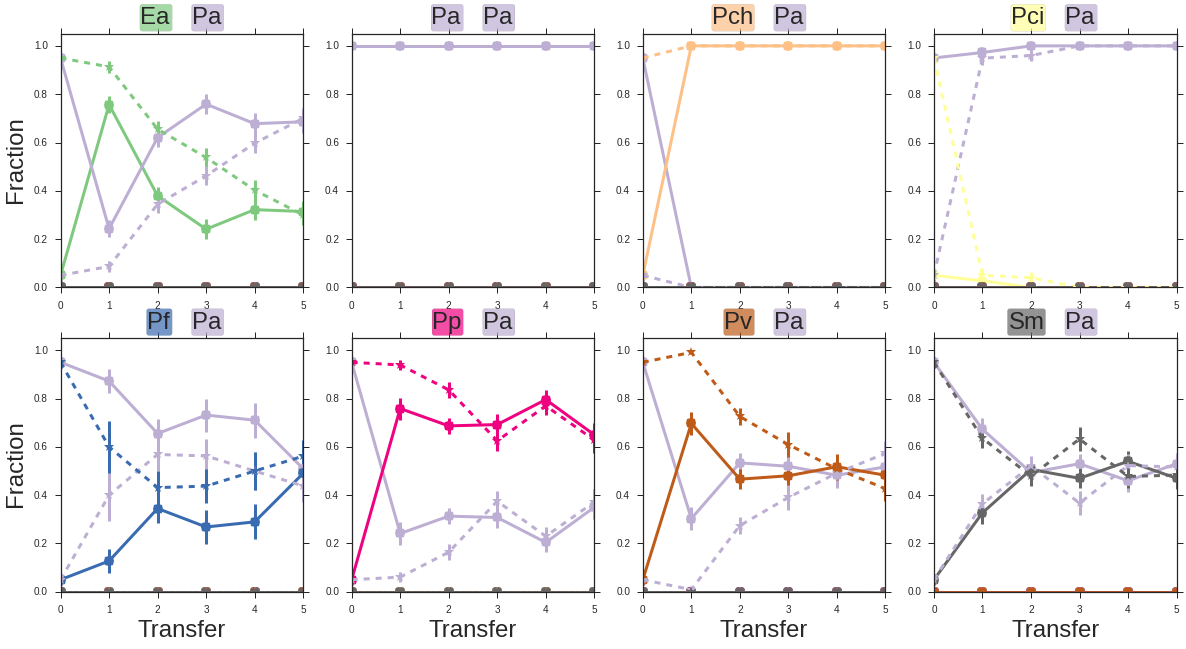

In [30]:
fig, axs = subplots(2,4, figsize=(4*5, 2*5))
for i,ax in enumerate(axs.flat):
    plot_pair(i, ax=ax)
    if ax.is_first_row():
        ax.set_xlabel('')
    if not ax.is_first_col():
        ax.set_ylabel('')

### Pairs final fracs

In [23]:
s = 0

Pa_frac = pd.DataFrame(0, columns=species, index=arange(8))
for s in arange(8):
    c = s+1
    r = string.uppercase[s]
    Pa_invaded = array([fracs_t5.loc[1, 'B', c].Pa, 
                           fracs_t5.loc[1, r, 2].Pa,
                           fracs_t5.loc[2, 'B', c].Pa,
                           fracs_t5.loc[3, 'B', c].Pa,
                          ])

    Pa_invading = array([fracs_t5.loc[2, r, 2].Pa, 
                             fracs_t5.loc[3, r, 2].Pa,
                             fracs_t5.loc[2, r, c].Pa, 
                             fracs_t5.loc[3, r, c].Pa, 
                             ])
    
    Pa_frac.iloc[:,s] = concatenate([Pa_invaded, Pa_invading])
    
Pa_frac

,Ea,Pa,Pch,Pci,Pf,Pp,Pv,Sm
0,0.676923,1,0,1,0.571429,0.339806,0.553571,0.474576
1,0.685714,1,0,1,0.509804,0.350000,0.517544,0.529915
2,0.717949,1,0,1,0.522727,0.302521,0.521008,0.420000
3,0.744186,1,0,1,0.538462,0.212121,0.416667,0.508197
4,0.822785,1,0,1,0.478261,0.251969,0.521277,0.558621
5,0.796992,1,0,1,0.540000,0.277778,0.420000,0.527607
6,0.700000,1,0,1,0.438596,0.371795,0.573034,0.516854
7,0.772455,1,0,1,0.532258,0.494253,0.530000,0.472441


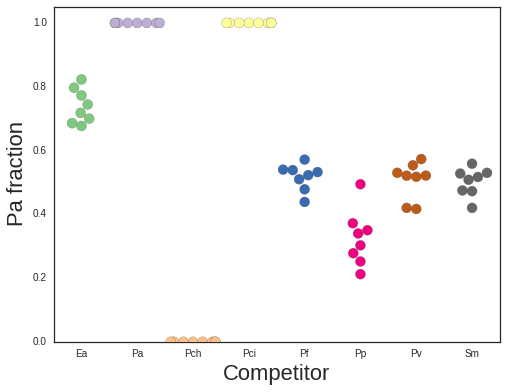

In [24]:
species_colors = array2colors(arange(8), cmap=cm.Accent)
species_colors_d = {species[i]:species_colors[i] for i in range(8) }

sns.set_style('white')
fig, ax = subplots(figsize=(8,6))
sns.swarmplot(data=Pa_frac, palette=species_colors, linewidth=.2, ax=ax, size=10)
ax.set_ylim(0,1.05)
ax.set_xlabel('Competitor', size=22)
ax.set_ylabel('Pa fraction', size=22)

### All pair outcomes

In [25]:
from TernPlot import TernPloter, make_interaction_network
outcomes_34 = pd.read_pickle('2015-05-21.EXP_34-Trio_competition/pair_outcomes.pick')
pair_frac_avg_34 = pd.read_pickle('2015-05-21.EXP_34-Trio_competition/pair_frac_avg.pick')

In [26]:
outcomes = outcomes_34.copy()
outcomes.loc['Pa', 'Pch'] = 'Pch'
outcomes.loc['Pch', 'Pa'] = 'Pch'

outcomes

,Ea,Pa,Pch,Pci,Pf,Pp,Pv,Sm
Ea,Ea,COX,COX,COX,COX,COX,COX,Ea
Pa,COX,Pa,Pch,Pa,COX,COX,COX,COX
Pch,COX,Pch,Pch,Pch,Pch,COX,COX,COX
Pci,COX,Pa,Pch,Pci,COX,Pp,Pv,COX
Pf,COX,COX,Pch,COX,Pf,COX,COX,COX
Pp,COX,COX,COX,Pp,COX,Pp,Pp,Pp
Pv,COX,COX,COX,Pv,COX,Pp,Pv,COX
Sm,Ea,COX,COX,COX,COX,Pp,COX,Sm


In [27]:
# def score_species(os):
#     s = os.name

def convert_outcomes(os):
    s = os.name
    os[os==s] = 'Win'
    os[~os.isin(['Win', 'COX'])] = 'Lose'
    return os

outcomes_win = outcomes.copy()
outcomes_win = outcomes_win.apply(convert_outcomes, axis=1)
outcomes_win

,Ea,Pa,Pch,Pci,Pf,Pp,Pv,Sm
Ea,Win,COX,COX,COX,COX,COX,COX,Win
Pa,COX,Win,Lose,Win,COX,COX,COX,COX
Pch,COX,Win,Win,Win,Win,COX,COX,COX
Pci,COX,Lose,Lose,Win,COX,Lose,Lose,COX
Pf,COX,COX,Lose,COX,Win,COX,COX,COX
Pp,COX,COX,COX,Win,COX,Win,Win,Win
Pv,COX,COX,COX,Win,COX,Lose,Win,COX
Sm,Lose,COX,COX,COX,COX,Lose,COX,Win


In [28]:
outcomes_d = {'Win':1, 'Lose':-1, 'COX':0}
outcomes_numeric = outcomes_win.applymap(lambda x:outcomes_d[x]).astype(float)

In [29]:
score = outcomes_numeric.sum(axis=1).sort_values(ascending=False)/8.
outcomes_sorted = outcomes_numeric.reindex(index=score.index, columns=score.index)

fill_diagonal(outcomes_sorted.values, nan)
outcomes_sorted

,Pp,Pch,Ea,Pv,Pa,Pf,Sm,Pci
Pp,NaN,0,0,1,0,0,1,1
Pch,0,NaN,0,0,1,1,0,1
Ea,0,0,NaN,0,0,0,1,0
Pv,-1,0,0,NaN,0,0,0,1
Pa,0,-1,0,0,NaN,0,0,1
Pf,0,-1,0,0,0,NaN,0,0
Sm,-1,0,-1,0,0,0,NaN,0
Pci,-1,-1,0,-1,-1,0,0,NaN


In [30]:
score

Pp     0.500
Pch    0.500
Ea     0.250
Pv     0.125
Pa     0.125
Pf     0.000
Sm    -0.125
Pci   -0.375
dtype: float64

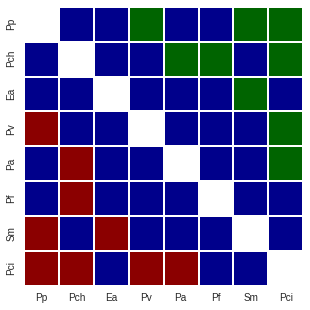

In [31]:
from matplotlib import colors
cmap = colors.ListedColormap(['darkred', 'darkblue', 'darkgreen'])

sns.set_style('white')

fig, ax = subplots(figsize=(5,5))
# sns.heatmap(outcomes_sorted, cmap='RdYlGn', linewidths=1, cbar=False)
sns.heatmap(outcomes_sorted, cmap=cmap, linewidths=1, cbar=False)

In [32]:
param_file = '2015-01-01.EXP_25-Pairwise_competition/params_lv_rows.txt'
logistic_params = pd.read_csv(param_file, index_col=0)
logistic_params.index = species
logistic_params

,tau,r,k,err
Ea,2.523822,0.455114,0.146856,5.667649
Pa,3.653114,0.550650,0.105767,7.795284
Pch,19.952178,0.171285,0.065286,20.792418
Pci,5.560203,0.114129,0.007801,5.302813
Pf,0.000000,0.137238,0.056314,20.015729
Pp,0.000000,0.652300,0.154193,5.188304
Pv,3.796915,0.566098,0.101936,15.928922
Sm,1.281825,0.339006,0.110969,6.296708


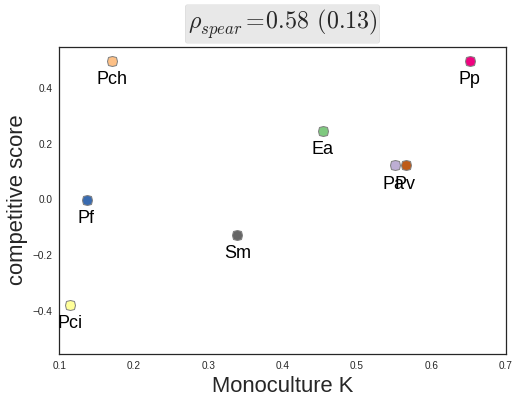

In [26]:
from scipy.stats import spearmanr

x_vals = logistic_params['r'].reindex_like(score)
y_vals = score
r, p =spearmanr(x_vals, y_vals)

fig, ax = subplots()
for k, x in x_vals.iteritems():
    c = species_colors_d[k]
    y = y_vals[k]
    
    ax.plot(x,y, 'o', ms=10, color=c, mec='gray', mew=1)
    ax.annotate(k, (x,y),
                ha='center', va='top',
                xytext=(0,-10), textcoords='offset points',
                family='sans-serif', fontsize=18, color='k')

ax.text(0.5, 1.02, r'$\rho_{spear} = %.2f \, (%.2g)$'%(r,p),
         ha='center', va='bottom', size=24, transform=ax.transAxes,
         bbox=dict(facecolor='lightgray', alpha=0.5, lw=0.1, boxstyle='round,pad=.1'))
    
ax.set_ylim(-.55, .55)
# ax.set_xlim(0,6)
ax.set_xlabel('Monoculture K', size=22)
ax.set_ylabel('competitive score', size=22)

### Trios 

In [129]:
def get_trio_data(s1, s2):
    '''
    Need to return a panel of: time x condition x species
    Need to return a df of: condition x species
    '''
    c1, c2 = s1+1, s2+1
    r1, r2 = string.uppercase[s1], string.uppercase[s2]
#     data= array([fracs_t5.loc[1, r1, c1], 
#                 fracs_t5.loc[1, r, 2].Pa,
#                            fracs_t5.loc[2, 'B', c].Pa,
#                            fracs_t5.loc[3, 'B', c].Pa,
#                           ])
    print r1,r2
    trio_fracs = pd.DataFrame(0, columns=species, index=arange(6))
#     print r1,c1, fracs_t5.loc[1, r1, c1]
    trio_fracs.loc[0] = fracs_t5.loc[1, r1, c2]
    trio_fracs.loc[1] = fracs_t5.loc[1, r2, c1]
    
    trio_fracs.loc[2] = fracs_t5.loc[2, r1, c2]
    trio_fracs.loc[3] = fracs_t5.loc[3, r1, c2]
    
    trio_fracs.loc[4] = fracs_t5.loc[2, r2, c1]
    trio_fracs.loc[5] = fracs_t5.loc[3, r2, c1]
    
    return trio_fracs

get_trio_data(0, 4)

A E


,Ea,Pa,Pch,Pci,Pf,Pp,Pv,Sm
0,0.252747,0.208791,0,0,0.538462,0,0,0
1,0.375000,0.034091,0,0,0.590909,0,0,0
2,0.516129,0.000000,0,0,0.483871,0,0,0
3,0.312500,0.000000,0,0,0.687500,0,0,0
4,0.464646,0.000000,0,0,0.535354,0,0,0
5,0.000000,0.000000,0,0,0.000000,0,0,0


F H


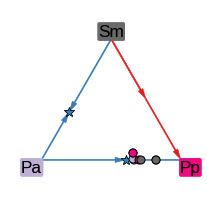

In [131]:
from TernPlot import TernPloter, make_interaction_network

# @interact(s1=(0,7), s2=(0,7), ax=fixed(None))
def plot_trio(s1,s2, ax=None):
    sps = [species[i] for i in [1, s1,s2]]
    cs = [species_colors_d[sp] for sp in sps]
    tmp = outcomes.reindex(sps,sps)
    net = make_interaction_network(tmp, pair_frac_avg_34)
    trio_fracs = get_trio_data(s1, s2)
    if ax is None:
        fig, ax = subplots(figsize=(3,3))
    tp = TernPloter(ax=ax, species_colors=species_colors_d, net=net, style='new')
    for i in range(3):
        tp.plot(trio_fracs.loc[i*2:(i+1)*2, sps], marker='o', lw=1, s=8**2, alpha=1, c=cs[i])
        
plot_trio(5,7)

A C
A D
A E
A F
A G
A H
C D
C E
C F
C G
C H
D E
D F
D G
D H
E F
E G
E H
F G
F H
G H


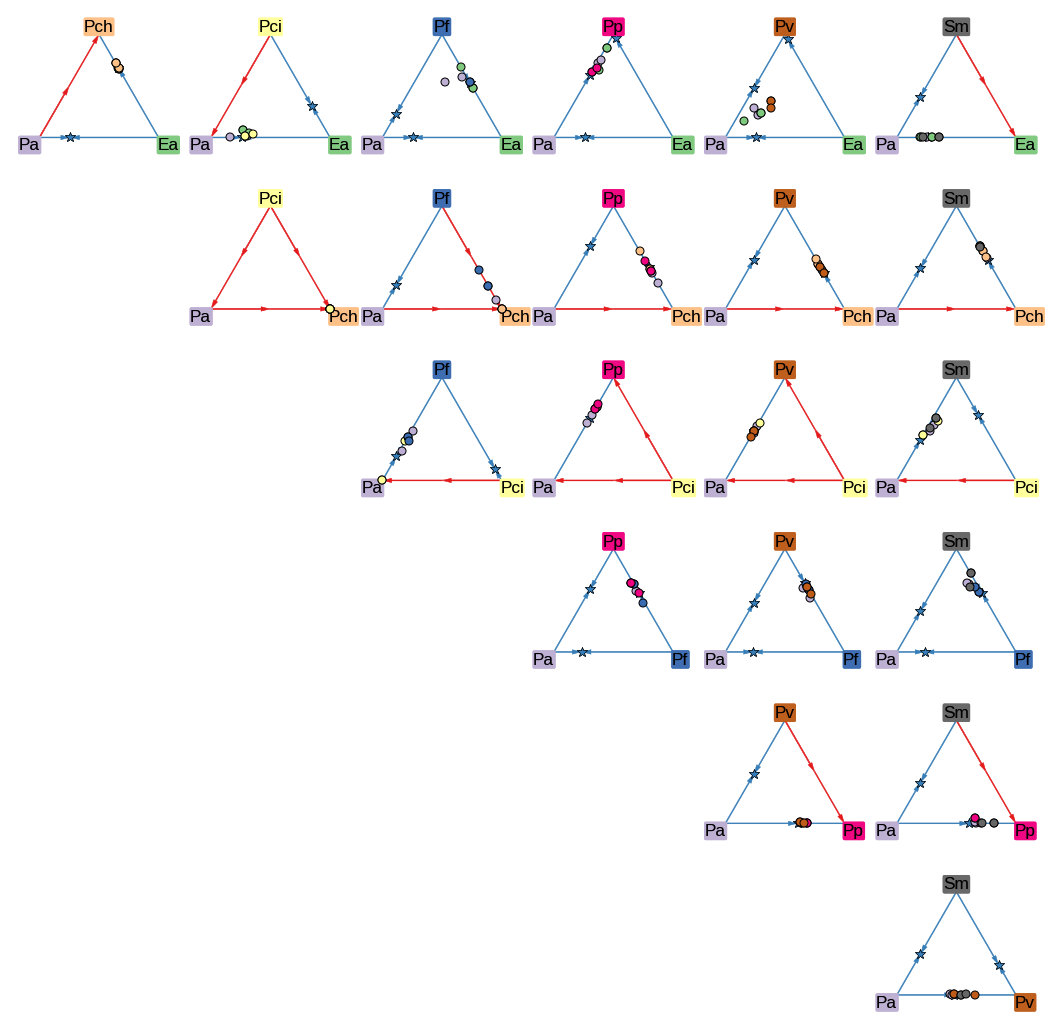

In [35]:
sps = [0,2,3,4,5,6,7]
n = len(sps)
fig, axs= subplots(n,n, figsize=(3*n, 3*n))
for r in range(n):
    axs[r,r].set_visible(False)
    for c in range(r+1,n):
        ax = axs[r,c]
        plot_trio(sps[r],sps[c], ax)
        axs[c,r].set_visible(False)


In [36]:
n_mistakes = 6.
n_total = 21
(1-n_mistakes/n_total/3)*100

90.47619047619048

#### layouts 

In [46]:
from itertools import permutations

def get_edges(net, nodes):
    edges = []
    for n1,n2 in combinations(nodes, 2):
        e = net[n1][n2]['outcome']
        if e==n1:
            e = 1
        elif e==n2:
            e = 2
        edges.append(e)
    return edges

def find_network_alignment(sps1, sps2, outcomes):
    tmp = outcomes.reindex(sps1,sps1)
    net1 = make_interaction_network(tmp, pair_frac_avg_34)
    
    tmp  = outcomes.reindex(sps2,sps2)
    net2 = make_interaction_network(tmp, pair_frac_avg_34)
    
    e1 = get_edges(net1, sps1)
    matches = []
    for s2 in permutations(sps2, 3):
        if e1 == get_edges(net2, s2):
            matches.append(s2)
    if not matches:
        return None
    
    asps1 = array(sps1)
    species_matches = [nonzero(asps1==array(m))[0].shape[0] for m in matches]
#     print matches
    return matches[argmax(species_matches)]


layouts = []
for sps in combinations(species, r=3):
    if not layouts:
        layouts.append([sps])
        continue
    match_found = False
    for layout in layouts:
        match = find_network_alignment(layout[0], sps, outcomes)
        if match:
            layout.append(match)
            match_found = True
            break
    if not match_found:
        layouts.append([sps])
sorted_layouts = sorted(layouts, key=len, reverse=True)
[len(l) for l in sorted_layouts]

[30, 15, 5, 4, 2]

In [47]:
## rotate layouts to match Zeeman paper
j = 0
n = len(sorted_layouts[j])
for i in range(n):
    l = sorted_layouts[j][i]
    sorted_layouts[j][i] = (l[1], l[0], l[2])

j = 3
n = len(sorted_layouts[j])
for i in range(n):
    l = sorted_layouts[j][i]
    sorted_layouts[j][i] = (l[0], l[2], l[1])
    
j = 4
n = len(sorted_layouts[j])
for i in range(n):
    l = sorted_layouts[j][i]
    sorted_layouts[j][i] = (l[2], l[1], l[0])

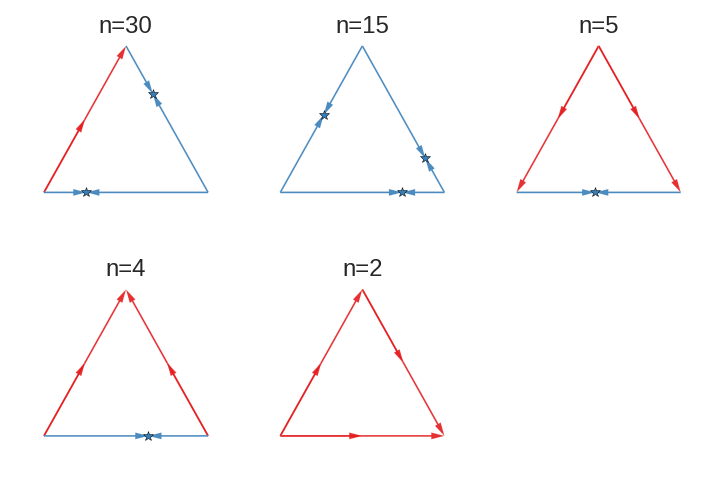

In [48]:
nr, nc = 2,3
w = 4
fig, axs = subplots(nr, nc, figsize=(nc*w, nr*w))
for i,layout in enumerate(sorted_layouts):
    r,c = unravel_index(i, (nr,nc))
    ax = axs[r,c]
    ind = 0 if i not in [2,3] else 2
    sps_names = layout[ind]
    sps = [species.index(s) for s in sps_names]
    tmp = outcomes.reindex(sps_names,sps_names)
    net = make_interaction_network(tmp, pair_frac_avg_34)

    cs = repeat([species_colors[s] for s in sps], 2)
    tp = TernPloter(species_colors=species_colors_d, net=net, ax=ax, style='new')
    tp.plot_net_boundry(sps_names, label_vertices=False)
#     tp.plot(vals, marker='o', lw=1, s=8**2, alpha=.7, c=cs)
    t = ax.set_title('n=%d'%len(layout), size=24)
    t.set_y(.85)

axs[-1,-1].set_visible(False)

In [49]:
outcomes

,Ea,Pa,Pch,Pci,Pf,Pp,Pv,Sm
Ea,Ea,COX,COX,COX,COX,COX,COX,Ea
Pa,COX,Pa,Pch,Pa,COX,COX,COX,COX
Pch,COX,Pch,Pch,Pch,Pch,COX,COX,COX
Pci,COX,Pa,Pch,Pci,COX,Pp,Pv,COX
Pf,COX,COX,Pch,COX,Pf,COX,COX,COX
Pp,COX,COX,COX,Pp,COX,Pp,Pp,Pp
Pv,COX,COX,COX,Pv,COX,Pp,Pv,COX
Sm,Ea,COX,COX,COX,COX,Pp,COX,Sm


### Predicting community structure with modifications

In [50]:
import itertools
import networkx as nx

def make_exclusion_network(outcomes):
    net = nx.DiGraph()
    sps = outcomes.index
    net.add_nodes_from(sps)
    for s1,s2 in itertools.combinations(sps,2):
        o = outcomes.loc[s1,s2]
        if o==s1:
            net.add_edge(s2,s1)
        elif o==s2:
            net.add_edge(s1,s2)
        elif o=='COX':
            continue
        else:
            raise ValueError, 'Encountered unsupported outcome for pair (%s, %s): %s'%(s1,s2,0)
    return net

def modify_outcomes(outcomes, modifiers):
    new_outcomes = outcomes.copy()
    for mod in modifiers.itervalues():
        for m in mod:
            n1,n2,o = m
            new_outcomes.loc[n1,n2] = o
            new_outcomes.loc[n2,n1] = o
    return new_outcomes

def get_terminal_nodes(net):
    n_excluders = net.out_degree()
    terminals = [n for n,v in n_excluders.iteritems() if v==0]
    return terminals


def get_surviving(outcomes, modifiers, max_iter=None):
    outcomes_survive = outcomes.copy()
    net_survive = make_exclusion_network(outcomes_survive)
    
    i=0
    max_iter = len(outcomes) if max_iter is None else max_iter
    while i<max_iter:
        i+=1
        ## modify network
        nodes_survive = net_survive.nodes()
        modifiers_survive = {k:v for k,v in modifiers.iteritems() if k in nodes_survive}
        new_outcomes = modify_outcomes(outcomes, modifiers_survive)
        outcomes_survive = new_outcomes.reindex(nodes_survive, nodes_survive)
        net_survive = make_exclusion_network(outcomes_survive)
        
        ## find stable nodes
        stable_nodes = get_terminal_nodes(net_survive)
        
        ## Remove all speceis excluded by the never_losers
        losers = list(itertools.chain.from_iterable( [net_survive.predecessors(n) for n in stable_nodes] ))
        
        to_remove = [l for l in losers if l not in stable_nodes]
        if not to_remove:
            break
        net_survive.remove_nodes_from(to_remove)   
        
    return net_survive.nodes()


modifiers = {
'Ea': [('Pci', 'Pp', 'COX'),('Pa', 'Pf', 'Pf'), ('Pch', 'Pp', 'Pch')], 
'Pch': [('Pv', 'Pp', 'Pv')],# ('Pv', 'Ea', 'Pv')], 
'Pci': [('Ea', 'Sm', 'COX')],
'Pp': [('Pa', 'Pf', 'Pf')],
'Pv': [('Pf', 'Pch', 'COX'), ('Pa', 'Pf', 'Pf'), ('Pa', 'Sm', 'Sm'), 
       ('Pch', 'Sm', 'Pch'), ('Pf', 'Sm', 'Pf'), ('Pp', 'Sm', 'COX')],
'Sm': [('Pf', 'Pch', 'COX'), ('Pp', 'Pv', 'COX')],
}


# modifiers = {}

sps = species
pred = sorted(get_surviving(outcomes.reindex(sps,sps), modifiers))
print 'All: ', pred


for i in range(8):
    sps = species[:i] +  species[i+1:]
    new_outcomes = modify_outcomes(outcomes.reindex(sps,sps), modifiers)
    
    pred = sorted(get_surviving(outcomes.reindex(sps,sps), modifiers))
    print '- %s: '%species[i], pred

All:  ['Ea', 'Pch', 'Pf', 'Pv']
- Ea:  ['Pch', 'Pf', 'Pv']
- Pa:  ['Ea', 'Pch', 'Pf', 'Pv']
- Pch:  ['Ea', 'Pf', 'Pp']
- Pci:  ['Ea', 'Pch', 'Pf', 'Pv']
- Pf:  ['Ea', 'Pch', 'Pv']
- Pp:  ['Ea', 'Pch', 'Pf', 'Pv']
- Pv:  ['Ea', 'Pch']
- Sm:  ['Ea', 'Pch', 'Pf', 'Pv']


In [51]:
modifiers = {}

sps = species
pred = sorted(get_surviving(outcomes.reindex(sps,sps), modifiers))
print 'All: ', pred


for i in range(8):
    sps = species[:i] +  species[i+1:]
    new_outcomes = modify_outcomes(outcomes.reindex(sps,sps), modifiers)
    
    pred = sorted(get_surviving(outcomes.reindex(sps,sps), modifiers))
    print '- %s: '%species[i], pred

All:  ['Ea', 'Pch', 'Pp']
- Ea:  ['Pch', 'Pp']
- Pa:  ['Ea', 'Pch', 'Pp']
- Pch:  ['Ea', 'Pa', 'Pf', 'Pp']
- Pci:  ['Ea', 'Pch', 'Pp']
- Pf:  ['Ea', 'Pch', 'Pp']
- Pp:  ['Ea', 'Pch', 'Pv']
- Pv:  ['Ea', 'Pch', 'Pp']
- Sm:  ['Ea', 'Pch', 'Pp']


In [52]:
fracs_med

,All,$\Delta_{Ea}$,$\Delta_{Pa}$,$\Delta_{Pch}$,$\Delta_{Pci}$,$\Delta_{Pf}$,$\Delta_{Pp}$,$\Delta_{Pv}$,$\Delta_{Sm}$
Ea,0.000000,0.000000,0.000000,0.077244,0.000000,0.000000,0.000000,0.215217,0.000000
Pa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pch,0.547247,0.674825,0.634554,0.000000,0.641491,0.569444,0.561644,0.784783,0.549960
Pci,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pf,0.029009,0.014756,0.017778,0.325678,0.031292,0.000000,0.000000,0.000000,0.015860
Pp,0.000000,0.000000,0.031606,0.597077,0.000000,0.000000,0.000000,0.000000,0.000000
Pv,0.412853,0.310419,0.316061,0.000000,0.327217,0.430556,0.438356,0.000000,0.434179
Sm,0.002427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### New rules

In [53]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

def modify_outcomes2(outcomes, modifiers):
    new_outcomes = outcomes.copy()
    nodes = outcomes.index
    losers = []
    for n_mod, mod in modifiers.iteritems():
        if n_mod not in nodes:
            continue
        for m in mod:
            n1,n2,o = m
            if (n1 not in nodes) or (n2 not in nodes):
                continue
            if o =='COX':
                new_outcomes.loc[n1,n2] = o
                new_outcomes.loc[n2,n1] = o
            else:
                winner1 = n_mod
                winner2 = n1 if n1==o else n2
                loser = n2 if n1==o else n1
                losers.append(loser)
    return new_outcomes, losers

def is_excluded(s, sps, outcomes, losers):
    '''
    Is species s excluded by anybody in a comunity composed of species set sps.
    Outcomes already include coexistence modifications.
    Losers are species that are excluded by a pair, rather than by a single species.
    '''
    if s in losers:
        return True
    
    others = list(sps)
    if s in others:
        others.remove(s)
    try:
        os = set(outcomes.loc[s,others])
    except:
        print s, others
        print outcomes, '\n'
        raise ValueError
#     print os
    for other in others:
        if other in os:
            return True
    
    return False

def can_invade(invader, residents, outcomes, losers):
    '''
    Can species invader invade species residents.
    A species can invade if it is not excluded by any of the residents or residents pairs.
    
    Outcomes is the modified outcomes in the presence of both residents and invader.
    '''
#     print invader, residents
    return not is_excluded(invader, residents, outcomes, losers)

def can_any_invade(all_species, residents, outcomes, modifications):
    '''
    Can any of the non-resident species invade?
    
    Outcomes should be the full set of unmofified outcomes for both residents and invaders
    '''
    invaders = set(all_species) - set(residents)
    for invader in invaders:
        ss_inv = list(residents) + [invader]
        os = outcomes.reindex(ss_inv,ss_inv)
        new_outcomes, losers = modify_outcomes2(os, modifications)
        if can_invade(invader, residents, new_outcomes, losers):
#             print invader
            return True
    return False

def is_any_excluded(sps, outcomes, losers):
    return any([is_excluded(s, sps, outcomes, losers) for s in sps])

def get_survival_options(sps, outcomes, modifications):
    '''
    '''
    survival = pd.DataFrame(index=sps)
    i = 0
    for ss in powerset(sps):
        os = outcomes.reindex(ss,ss)
        ##losers are species that are excluded by a pair, rather than by a single species
        new_outcomes, losers = modify_outcomes2(os, modifications) 
        if not is_any_excluded(ss, new_outcomes, losers) and not can_any_invade(sps, ss, outcomes, modifications):
            survival[i] = 0
            survival.loc[list(ss), i] = 1
            i += 1
#             print ss
    return survival


In [54]:
survival_obs = (fracs_med>.02).astype(int)
for i in range(8):
    survival_obs.iloc[i,i+1] = nan
survival_obs.sum(axis=1)

Ea     2
Pa     0
Pch    8
Pci    0
Pf     3
Pp     2
Pv     7
Sm     0
dtype: float64

In [55]:
survival_obs = (fracs_med>.01).astype(int)
for i in range(8):
    survival_obs.iloc[i,i+1] = nan
survival_obs.sum(axis=1)

Ea     2
Pa     0
Pch    8
Pci    0
Pf     6
Pp     2
Pv     7
Sm     0
dtype: float64

In [56]:
modifiers = {
'Ea': [('Pci', 'Pp', 'COX'),('Pa', 'Pf', 'Pf'), ('Pch', 'Pp', 'Pch')], 
'Pch': [('Pv', 'Pp', 'Pv')], #('Pv', 'Ea', 'Pv')], 
'Pci': [('Ea', 'Sm', 'COX')],
'Pp': [('Pa', 'Pf', 'Pf')],
'Pv': [('Pf', 'Pch', 'COX'), ('Pa', 'Pf', 'Pf'), ('Pa', 'Sm', 'Sm'), 
       ('Pch', 'Sm', 'Pch'), ('Pf', 'Sm', 'Pf'), ('Pp', 'Sm', 'COX')],
'Sm': [('Pf', 'Pch', 'COX'), ('Pp', 'Pv', 'COX')],
}


# modifiers = {}

survival_pred_pairs = survival_obs.copy()
survival_pred_trios = survival_obs.copy()

survival_pred_pairs.iloc[:,0] = get_survival_options(species, outcomes, {})
survival_pred_trios.iloc[:,0] = get_survival_options(species, outcomes, modifiers)

for i in range(8):
    sps = species[:i] +  species[i+1:]
    pred = get_survival_options(sps, outcomes, {}).iloc[:,-1]
    survival_pred_pairs.iloc[:,i+1] = pred
    
    pred = get_survival_options(sps, outcomes, modifiers).iloc[:,-1]
    survival_pred_trios.iloc[:,i+1] = pred


pred = get_survival_options(species, outcomes, {}).iloc[:,-1]
survival_pred_pairs.iloc[:,0] = pred

pred = get_survival_options(species, outcomes, modifiers).iloc[:,-1]
survival_pred_trios.iloc[:,0] = pred
    
    
survival_pred_pairs

,All,$\Delta_{Ea}$,$\Delta_{Pa}$,$\Delta_{Pch}$,$\Delta_{Pci}$,$\Delta_{Pf}$,$\Delta_{Pp}$,$\Delta_{Pv}$,$\Delta_{Sm}$
Ea,1,NaN,1,1,1,1,1,1,1
Pa,0,0,NaN,1,0,0,0,0,0
Pch,1,1,1,NaN,1,1,1,1,1
Pci,0,0,0,0,NaN,0,0,0,0
Pf,0,0,0,1,0,NaN,0,0,0
Pp,1,1,1,1,1,1,NaN,1,1
Pv,0,0,0,0,0,0,1,NaN,0
Sm,0,0,0,0,0,0,0,0,NaN


In [57]:
survival_pred_trios    

,All,$\Delta_{Ea}$,$\Delta_{Pa}$,$\Delta_{Pch}$,$\Delta_{Pci}$,$\Delta_{Pf}$,$\Delta_{Pp}$,$\Delta_{Pv}$,$\Delta_{Sm}$
Ea,1,NaN,1,1,1,1,1,1,1
Pa,0,0,NaN,0,0,0,0,0,0
Pch,1,1,1,NaN,1,1,1,1,1
Pci,0,0,0,1,NaN,0,0,0,0
Pf,1,1,1,1,1,NaN,1,0,1
Pp,0,0,0,1,0,0,NaN,0,0
Pv,1,1,1,0,1,1,1,NaN,1
Sm,0,0,0,0,0,0,0,0,NaN


In [58]:
survival_obs

,All,$\Delta_{Ea}$,$\Delta_{Pa}$,$\Delta_{Pch}$,$\Delta_{Pci}$,$\Delta_{Pf}$,$\Delta_{Pp}$,$\Delta_{Pv}$,$\Delta_{Sm}$
Ea,0,NaN,0,1,0,0,0,1,0
Pa,0,0,NaN,0,0,0,0,0,0
Pch,1,1,1,NaN,1,1,1,1,1
Pci,0,0,0,0,NaN,0,0,0,0
Pf,1,1,1,1,1,NaN,0,0,1
Pp,0,0,1,1,0,0,NaN,0,0
Pv,1,1,1,0,1,1,1,NaN,1
Sm,0,0,0,0,0,0,0,0,NaN


In [59]:
# Predictions of majority rule

n_survive = survival_obs.sum()
survival_major = survival_obs.copy()
for c, n in n_survive.iteritems():
    v = 1 if n>=4 else 0
    survival_major[c] = v

survival_major.iloc[:,:] = 0
    
for i in range(8):
    survival_major.iloc[i,i+1] = nan
    
survival_major

,All,$\Delta_{Ea}$,$\Delta_{Pa}$,$\Delta_{Pch}$,$\Delta_{Pci}$,$\Delta_{Pf}$,$\Delta_{Pp}$,$\Delta_{Pv}$,$\Delta_{Sm}$
Ea,0,NaN,0,0,0,0,0,0,0
Pa,0,0,NaN,0,0,0,0,0,0
Pch,0,0,0,NaN,0,0,0,0,0
Pci,0,0,0,0,NaN,0,0,0,0
Pf,0,0,0,0,0,NaN,0,0,0
Pp,0,0,0,0,0,0,NaN,0,0
Pv,0,0,0,0,0,0,0,NaN,0
Sm,0,0,0,0,0,0,0,0,NaN


In [63]:
filepath = '2016-02-03.EXP_41-competitions_with_new_Pa'
survival_obs.to_csv(filepath + 'multispecies_outcomes.observed.csv')
survival_pred_pairs.to_csv(filepath + 'multispecies_outcomes.prediction_pairs.csv')
survival_pred_trios.to_csv(filepath + 'multispecies_outcomes.prediction_trios.csv')
survival_major.to_csv(filepath + 'multispecies_outcomes.prediction_majoirty.csv')

In [60]:
print 1-abs(survival_obs - survival_pred_pairs).sum().sum()/64
print 1-abs(survival_obs.iloc[:,1:] - survival_pred_pairs.iloc[:,1:] ).sum().sum()/56

abs(survival_obs - survival_pred_pairs).sum()

0.625
0.642857142857


All               4
$\Delta_{Ea}$     3
$\Delta_{Pa}$     3
$\Delta_{Pch}$    1
$\Delta_{Pci}$    4
$\Delta_{Pf}$     3
$\Delta_{Pp}$     1
$\Delta_{Pv}$     1
$\Delta_{Sm}$     4
dtype: float64

In [61]:
print 1-abs(survival_obs - survival_pred_trios).sum().sum()/64
print 1-abs(survival_obs.iloc[:,1:] - survival_pred_trios.iloc[:,1:] ).sum().sum()/56

abs(survival_obs - survival_pred_trios).sum()

0.859375
0.857142857143


All               1
$\Delta_{Ea}$     0
$\Delta_{Pa}$     2
$\Delta_{Pch}$    1
$\Delta_{Pci}$    1
$\Delta_{Pf}$     1
$\Delta_{Pp}$     2
$\Delta_{Pv}$     0
$\Delta_{Sm}$     1
dtype: float64

In [387]:
1-abs(survival_obs - survival_major).sum().sum()/64

0.609375

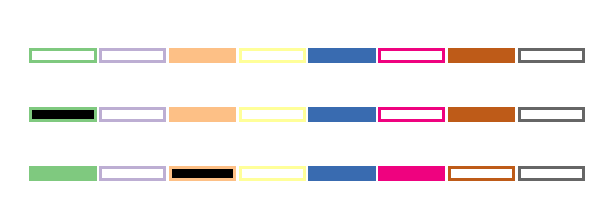

In [93]:
def plot_presence(presence, rec_colors, ax=None, space=.01):
    '''
    presence : iterable of booleans
    '''
    if ax is None:
        fig, ax = subplots(figsize=(10,1))
    
    n = len(presence)
    width = 1./n-space
    
    for i in range(8):
        if isnan(presence[i]):
            c='k'
        else:
            c = rec_colors[i] if presence[i] else 'w'
        
        x = space/2 +i*(width+space)
        rec = mpl.patches.Rectangle((x,0), width, width*2,  fc=c, ec=rec_colors[i], lw=3, clip_on=False)
                                    #transform=ax.transAxes)
        ax.add_patch(rec)

    ax.set_xlim(0,1)
#     ax.set_ylim(0, width)
    ax.set_axis_off()
    return ax


fig, axs = subplots(3,1, figsize=(10,3))

plot_presence(survival_obs['All'].values, species_colors, ax=axs[0])
plot_presence(survival_obs[u'$\Delta_{Ea}$'].values, species_colors, ax=axs[1])
plot_presence(survival_obs[u'$\Delta_{Pch}$'].values, species_colors, ax=axs[2])

In [95]:
survival_obs

,All,$\Delta_{Ea}$,$\Delta_{Pa}$,$\Delta_{Pch}$,$\Delta_{Pci}$,$\Delta_{Pf}$,$\Delta_{Pp}$,$\Delta_{Pv}$,$\Delta_{Sm}$
Ea,0,NaN,0,1,0,0,0,1,0
Pa,0,0,NaN,0,0,0,0,0,0
Pch,1,1,1,NaN,1,1,1,1,1
Pci,0,0,0,0,NaN,0,0,0,0
Pf,1,1,1,1,1,NaN,0,0,1
Pp,0,0,1,1,0,0,NaN,0,0
Pv,1,1,1,0,1,1,1,NaN,1
Sm,0,0,0,0,0,0,0,0,NaN


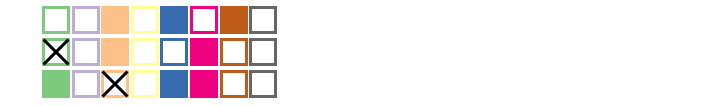

In [373]:
def plot_presence(presence, rec_colors, ax=None, ms=25, l=10, s=.9, exclude=[]):
    '''
    presence : iterable of booleans
    '''
    if ax is None:
        fig, ax = subplots(figsize=(l,1))
    
    n = len(presence)
    w = 1./l*(ms/50.)
    
    
    
    for i in range(n):
        if isnan(presence[i]) or i in exclude:
            c='w'
        else:
            c = rec_colors[i] if presence[i] else 'w'
        
        x = s*w*i + w/2
        
        ax.plot(x, 0, 's', ms=ms, clip_on=False, 
               mec=rec_colors[i], mfc=c, mew=3)
        
        if isnan(presence[i]) or i in exclude:
            ax.plot(x, 0, 'x', ms=ms, clip_on=False, 
               c='k', mew=3)
    
#     for i in range(8):
#         c = rec_colors[i] if presence[i] else 'w'
        
#         x = space/2 +i*(width+space)
#         rec = mpl.patches.Rectangle((x,0), width, width*2,  fc=c, ec=rec_colors[i], lw=3, clip_on=False)
#                                     #transform=ax.transAxes)
#         ax.add_patch(rec)

    ax.set_xlim(0,1)
#     ax.set_ylim(0, width)
    ax.set_axis_off()
    return ax


fig, axs = subplots(3,1, figsize=(10,1.5))

plot_presence(survival_obs['All'].values, species_colors, ax=axs[0])
plot_presence(survival_pred_pairs[u'$\Delta_{Ea}$'].values, species_colors, ax=axs[1])
plot_presence(survival_obs[u'$\Delta_{Pch}$'].values, species_colors, ax=axs[2], exclude=[2])

tight_layout()

(-0.059999999999999998, 0.059999999999999998)

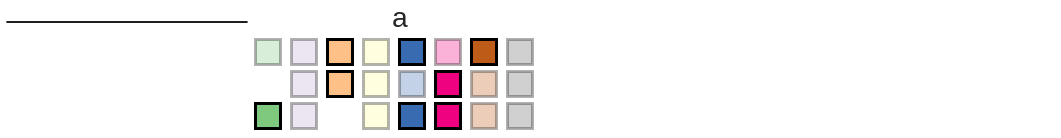

In [375]:
def plot_presence(presence, rec_colors, ax=None, ms=25, l=10, s=.9, exclude=[]):
    '''
    presence : iterable of booleans
    '''
    if ax is None:
        fig, ax = subplots(figsize=(l,1))
    
    n = len(presence)
    w = 1./l*(ms/50.)
    
    
    
    for i in range(n):
        if isnan(presence[i]) or i in exclude:
            continue
#             a = 0
        else:
            a = 1 if presence[i] else .3
        
        c = rec_colors[i]
        
        x = s*w*i + w/2
        
        ax.plot(x, 0, 's', ms=ms, clip_on=False, 
               mec='k', mfc=c, mew=3, alpha=a)
        
        if isnan(presence[i]) or i in exclude:
            ax.plot(x, 0, 'x', ms=ms, clip_on=False, 
               c='k', mew=3)
    
#     for i in range(8):
#         c = rec_colors[i] if presence[i] else 'w'
        
#         x = space/2 +i*(width+space)
#         rec = mpl.patches.Rectangle((x,0), width, width*2,  fc=c, ec=rec_colors[i], lw=3, clip_on=False)
#                                     #transform=ax.transAxes)
#         ax.add_patch(rec)

    ax.set_xlim(0,1)
#     ax.set_ylim(0, width)
    ax.set_axis_off()
    return ax


fig, axs = subplots(3,1, figsize=(12,1.5))

plot_presence(survival_obs['All'].values, species_colors, ax=axs[0])
plot_presence(survival_pred_pairs[u'$\Delta_{Ea}$'].values, species_colors, ax=axs[1])
plot_presence(survival_obs[u'$\Delta_{Pch}$'].values, species_colors, ax=axs[2], exclude=[2])

tight_layout()

ax = axs[0]
ax.text(.2, -10, 'a', ha='right', va='bottom', transform=ax.transAxes, fontsize=28)

yl = ax.get_ylim()

ax.plot([-.3, 0], [-2]*2, 'k', clip_on=False)

ax.set_ylim(yl)

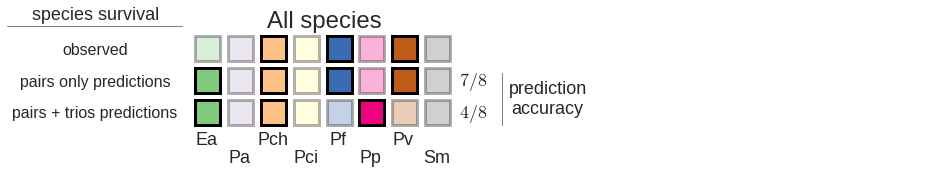

In [379]:
fig, axs = subplots(3,1, figsize=(11,1.5))

plot_presence(survival_obs['All'].values, species_colors, ax=axs[0])
plot_presence(survival_pred_trios['All'].values, species_colors, ax=axs[1])
plot_presence(survival_pred_pairs['All'].values, species_colors, ax=axs[2])


tight_layout()

for ax, data in zip(axs[1:], [survival_pred_trios, survival_pred_pairs]):
    accuracy = (data.iloc[:,0]==survival_obs.iloc[:,0]).sum()
    ax.text(.37, 1.5, r'$%d/8$'%accuracy, ha='left', va='center', transform=ax.transAxes, fontsize=18) 

xloc = -.13
axs[0].text(xloc, 1.5, 'observed', ha='center', va='center', transform=axs[0].transAxes, fontsize=16)
axs[1].text(xloc, 1.5, 'pairs only predictions', ha='center', va='center', transform=axs[1].transAxes, fontsize=16)
axs[2].text(xloc, 1.5, 'pairs + trios predictions', ha='center', va='center', transform=axs[2].transAxes, fontsize=16)

axs[0].text(.185, -8, 'All species', ha='center', va='bottom', transform=axs[0].transAxes, fontsize=24) 

ax = axs[-1]
ms=25; l=10; s=.9
w = 1./l*(ms/50.)
for i, sp in enumerate(species):
    x = s*w*i + w/2
    y = 12 + 10*(i%2)
    ax.text(x, y, sp, ha='center', va='top', transform=axs[-1].transAxes, fontsize=18)

ax = axs[0]
yl = ax.get_ylim()
ax.plot([-.25, -.01], [-1.5]*2, 'gray', clip_on=False, lw=1)
axs[0].text(xloc, -18, 'species survival', ha='center', va='center', transform=axs[0].transAxes, fontsize=18)
ax.set_ylim(yl)

ax = axs[1]

l = mpl.lines.Line2D((.43,.43),(-21,8),transform=axs[-1].transAxes, color='gray', lw=1)
fig.lines.append(l)
axs[-1].text(.44, -6.5, 'prediction\naccuracy', ha='left', va='center', ma='center',
             transform=axs[-1].transAxes, fontsize=18)

# ax.annotate(s='aaa', xy=(.42, 1.5), xytext=(.5, 1.5), clip_on=False,
#             arrowprops=dict(facecolor='black'),
#             xycoords='axes fraction', textcoords='axes fraction',)

# ax.arrow(.5, 0, -.000, 0,clip_on=False, transform=ax.transAxes,
#         head_width=0.05, head_length=0.1, fc='k', ec='k')

# yl = ax.get_ylim()
# ax.plot([.5]*2, yl, 'gray', clip_on=False, lw=10, zorder=0)

In [255]:
yl

(-0.059999999999999998, 0.059999999999999998)

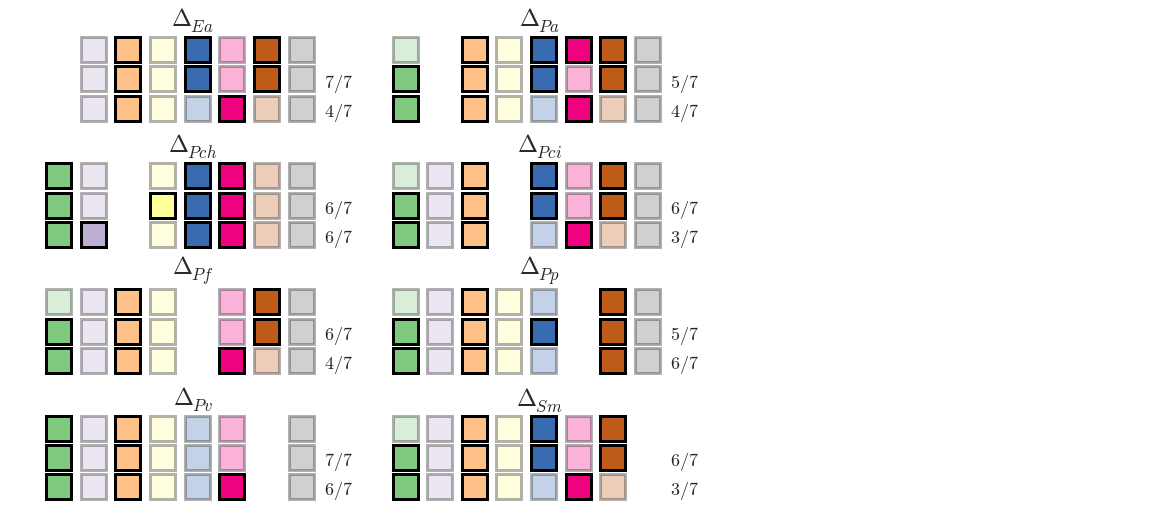

In [388]:
# fig, axs = subplots(4,2, figsize=(20,6))
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(20, 8))

# gridspec inside gridspec
outer_grid = gridspec.GridSpec(4, 2, wspace=-.55, hspace=0.85)

for i in range(8):
    inner_grid = gridspec.GridSpecFromSubplotSpec(3, 1,
            subplot_spec=outer_grid[i], wspace=0.1, hspace=2)
    for j, data in enumerate([survival_obs, survival_pred_trios, survival_pred_pairs]):
        ax = plt.Subplot(fig, inner_grid[j])
        plot_presence(data.iloc[:,i+1].values, species_colors, ax=ax, exclude=[i])
#         ax.set_xticks([])
#         ax.set_yticks([])
        fig.add_subplot(ax)
        if j>0:
            accuracy = (data.iloc[:,i+1]==survival_obs.iloc[:,i+1]).sum()
            ax.text(.37, 0, r'$%d/7$'%accuracy, ha='left', va='center', transform=ax.transAxes, fontsize=18) 
        
        if j==0:
            ax.text(.2, 2, survival_obs.columns[i+1], ha='center', va='bottom', transform=ax.transAxes, fontsize=24) 
            


#     ax = plt.Subplot(fig, inner_grid[1])
#     ax.text(0, 0, 'aa', size=220, ha='left', va='center')

In [ ]:
fig = plt.figure(figsize=(8, 8))

# gridspec inside gridspec
outer_grid = gridspec.GridSpec(4, 4, wspace=0.0, hspace=0.0)

for i in range(16):
    inner_grid = gridspec.GridSpecFromSubplotSpec(3, 3,
            subplot_spec=outer_grid[i], wspace=0.0, hspace=0.0)
    a, b = int(i/4)+1,i%4+1
    for j, (c, d) in enumerate(product(range(1, 4), repeat=2)):
        ax = plt.Subplot(fig, inner_grid[j])
        ax.plot(*squiggle_xy(a, b, c, d))
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

all_axes = fig.get_axes()

#show only the outside spines
for ax in all_axes:
    for sp in ax.spines.values():
        sp.set_visible(False)
    if ax.is_first_row():
        ax.spines['top'].set_visible(True)
    if ax.is_last_row():
        ax.spines['bottom'].set_visible(True)
    if ax.is_first_col():
        ax.spines['left'].set_visible(True)
    if ax.is_last_col():
        ax.spines['right'].set_visible(True)